In [1]:
import os
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

# Global options

In [2]:
sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(-12.5, 5)
ylim=(-12.5, 6)
alpha=1
# marker='o'
s=10
legend=False
linewidth=0

# Data paths

In [3]:
base_root = "/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/small_RNA_seq_15_C/results/no_filter/"

In [4]:
DE__WT_A_B_C__Dpf_3_null = os.path.join(base_root, "DE__WT_A_B_C__Dpf_3_null", "plot_small_RNAs", "22G.tsv")

In [5]:
DE__WT_D_E_F__Dpf_3_null = os.path.join(base_root, "DE__WT_D_E_F__Dpf_3_null", "plot_small_RNAs", "22G.tsv")

In [6]:
DE__WT_A_B_C__Dpf_3_S784A = os.path.join(base_root, "DE__WT_A_B_C__Dpf_3_S784A", "plot_small_RNAs", "22G.tsv")

In [7]:
DE__WT_D_E_F__Dpf_3_S784A = os.path.join(base_root, "DE__WT_D_E_F__Dpf_3_S784A", "plot_small_RNAs", "22G.tsv")

In [8]:
DE__WT_A_B_C__mut_2 = os.path.join(base_root, "DE__WT_A_B_C__mut_2", "plot_small_RNAs", "22G.tsv")

In [9]:
DE__WT_D_E_F__mut_2 = os.path.join(base_root, "DE__WT_A_B_C__mut_2", "plot_small_RNAs", "22G.tsv")

In [10]:
DE__WT_A_B_C__mut_7 = os.path.join(base_root, "DE__WT_D_E_F__mut_7", "plot_small_RNAs", "22G.tsv")

In [11]:
DE__WT_D_E_F__mut_7 = os.path.join(base_root, "DE__WT_D_E_F__mut_7", "plot_small_RNAs", "22G.tsv")

# Read in data

In [12]:
DE__WT_A_B_C__Dpf_3_null_df = pd.read_csv(DE__WT_A_B_C__Dpf_3_null, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_A_B_C__Dpf_3_null_df.set_index("id", inplace=True)
DE__WT_A_B_C__Dpf_3_null_df.columns = DE__WT_A_B_C__Dpf_3_null_df.columns + "_Dpf_3_null"

In [13]:
DE__WT_D_E_F__Dpf_3_S784A_df = pd.read_csv(DE__WT_D_E_F__Dpf_3_S784A, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_D_E_F__Dpf_3_S784A_df.set_index("id", inplace=True)
DE__WT_D_E_F__Dpf_3_S784A_df.columns = DE__WT_D_E_F__Dpf_3_S784A_df.columns + "_Dpf_3_S784A"

In [14]:
DE__WT_A_B_C__mut_2_df = pd.read_csv(DE__WT_A_B_C__mut_2, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_A_B_C__mut_2_df.set_index("id", inplace=True)
DE__WT_A_B_C__mut_2_df.columns = DE__WT_A_B_C__mut_2_df.columns + "_mut2"

In [15]:
DE__WT_D_E_F__mut_7_df = pd.read_csv(DE__WT_D_E_F__mut_7, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_D_E_F__mut_7_df.set_index("id", inplace=True)
DE__WT_D_E_F__mut_7_df.columns = DE__WT_D_E_F__mut_7_df.columns + "_mut7"

In [16]:
DE__WT_D_E_F__mut_2_df = pd.read_csv(DE__WT_D_E_F__mut_2, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_D_E_F__mut_2_df.set_index("id", inplace=True)
DE__WT_D_E_F__mut_2_df.columns = DE__WT_D_E_F__mut_2_df.columns + "_mut2"

In [17]:
DE__WT_A_B_C__mut_7_df = pd.read_csv(DE__WT_A_B_C__mut_7, header=0, sep="\t")[["id", "logFC", "logCPM", "FDR"]]
DE__WT_A_B_C__mut_7_df.set_index("id", inplace=True)
DE__WT_A_B_C__mut_7_df.columns = DE__WT_A_B_C__mut_7_df.columns + "_mut7"

In [18]:
DE__WT_A_B_C__Dpf_3_null_df.shape

(308940, 3)

In [19]:
DE__WT_D_E_F__Dpf_3_S784A_df.shape

(307288, 3)

In [20]:
DE__WT_A_B_C__mut_2_df.shape

(240588, 3)

In [21]:
DE__WT_D_E_F__mut_7_df.shape

(305411, 3)

In [22]:
DE__WT_A_B_C__mut_7_df.shape

(305411, 3)

# Merge data DE__WT_A_B_C__Dpf_3_null_df and DE__WT_D_E_F__Dpf_3_S784A_df

In [23]:
name_x = "Dpf_3_null"
name_y = "Dpf_3_S784A"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_A_B_C__Dpf_3_null_df, DE__WT_D_E_F__Dpf_3_S784A_df, on="id")

In [24]:
df.shape, df.columns

((147358, 6), Index(['logFC_Dpf_3_null', 'logCPM_Dpf_3_null', 'FDR_Dpf_3_null',
        'logFC_Dpf_3_S784A', 'logCPM_Dpf_3_S784A', 'FDR_Dpf_3_S784A'],
       dtype='object'))

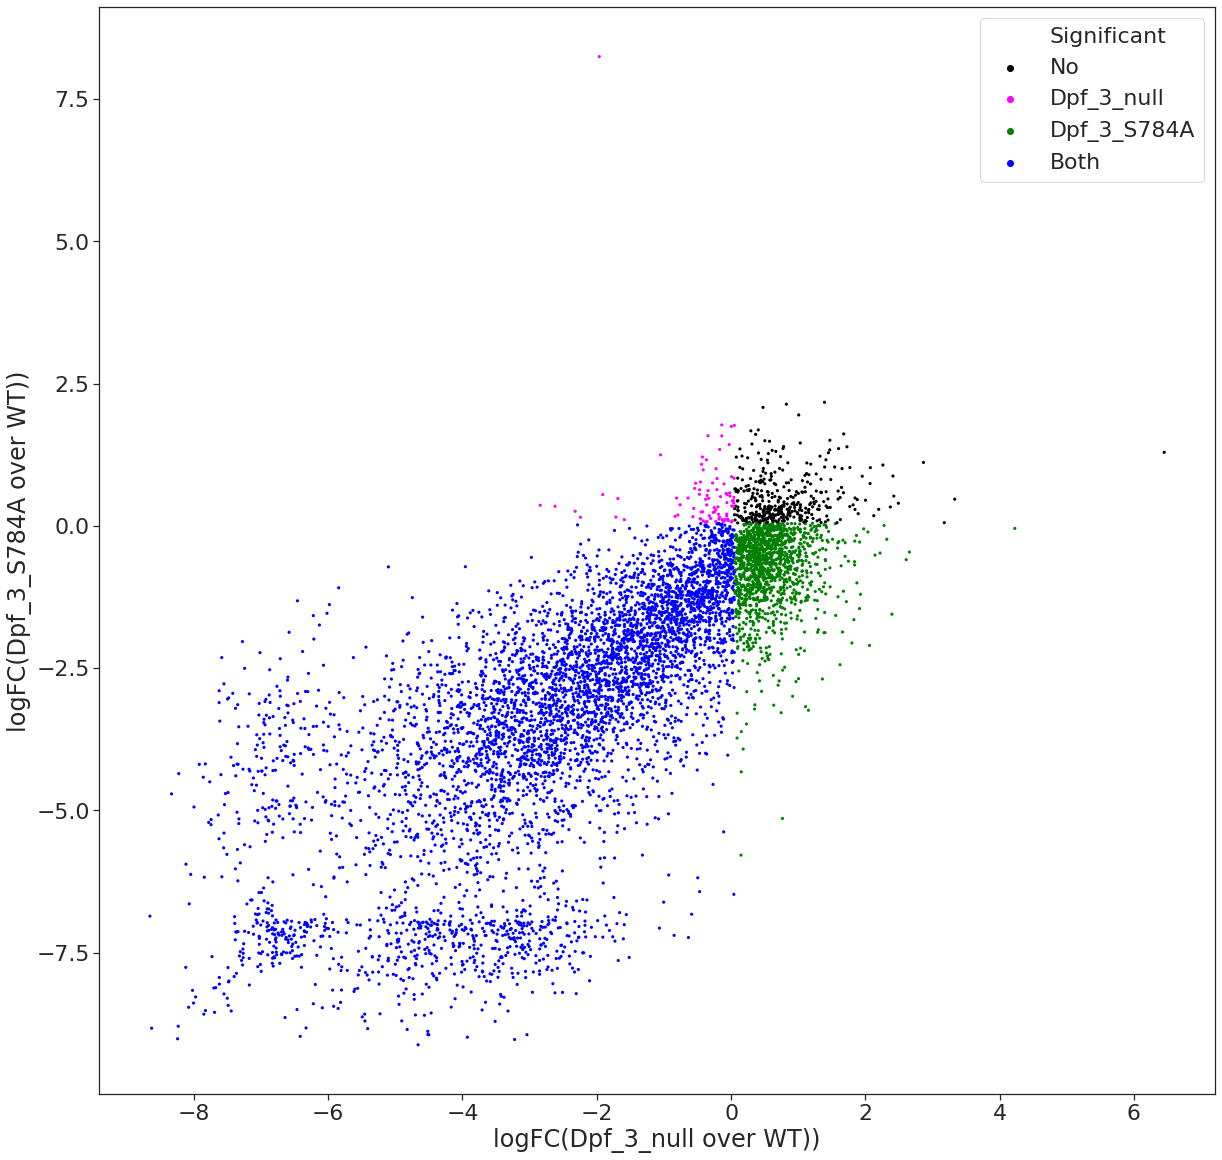

Both           5089
Dpf_3_S784A    1260
No              372
Dpf_3_null       86
Name: Significant, dtype: int64

In [25]:
df_short = df[(df[f"logCPM_{name_x}"]>2) | (df[f"logCPM_{name_y}"]>2)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

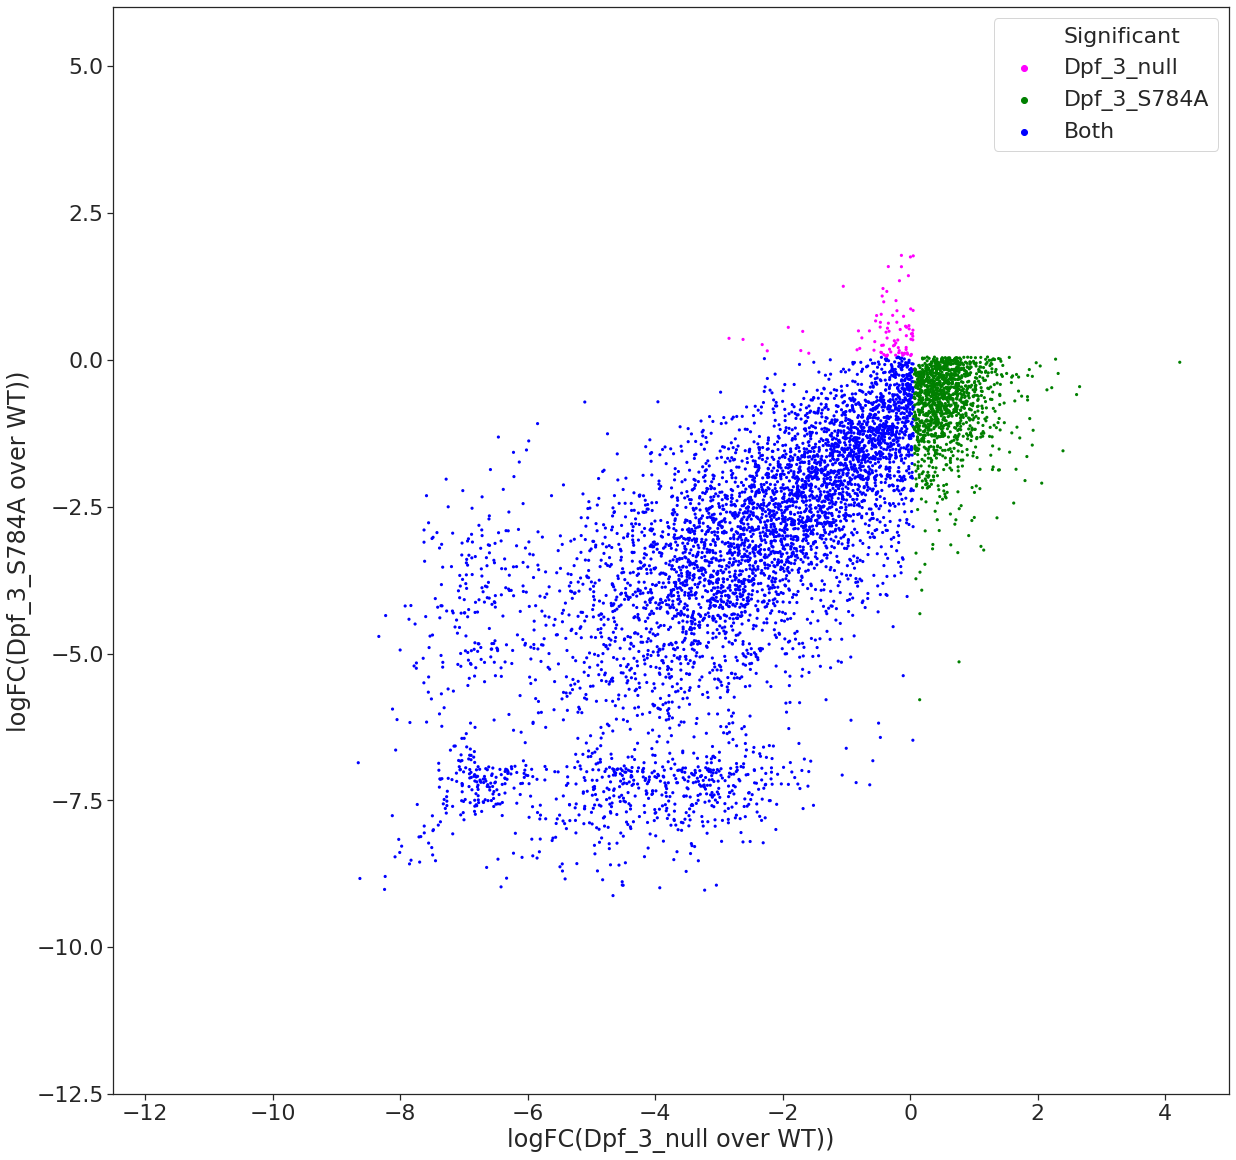

Both           5089
Dpf_3_S784A    1260
Dpf_3_null       86
Name: Significant, dtype: int64

In [26]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

# Merge data mut2 and mut7

In [27]:
name_x = "mut2"
name_y = "mut7"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_A_B_C__mut_2_df, DE__WT_D_E_F__mut_7_df, on="id")

In [28]:
df.shape, df.columns

((128060, 6),
 Index(['logFC_mut2', 'logCPM_mut2', 'FDR_mut2', 'logFC_mut7', 'logCPM_mut7',
        'FDR_mut7'],
       dtype='object'))

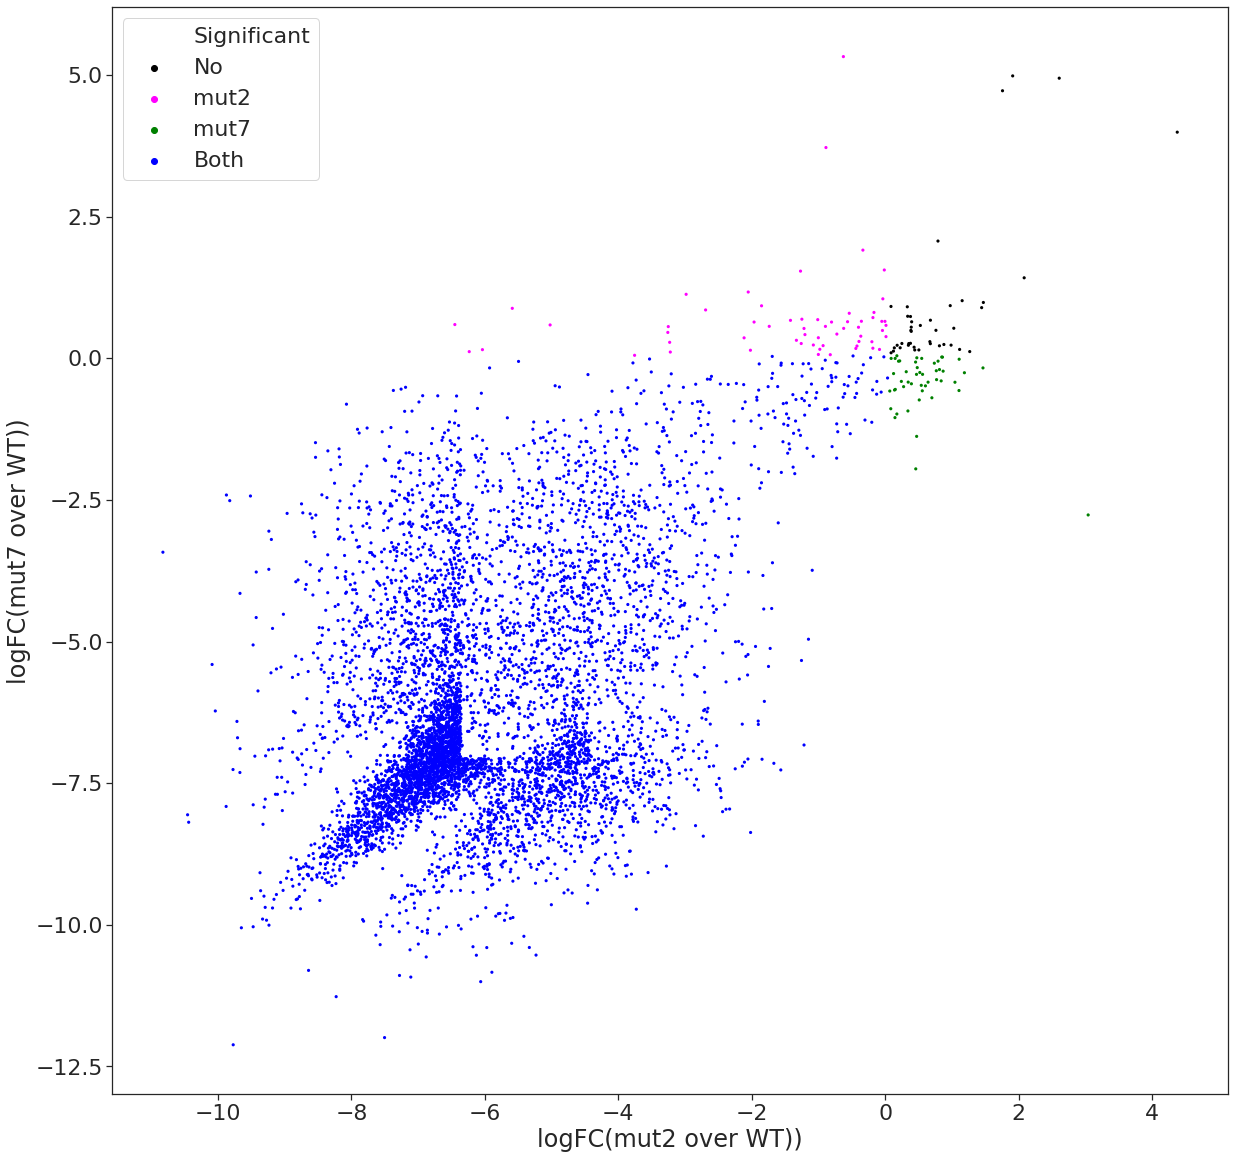

Both    6579
mut2      59
mut7      48
No        41
Name: Significant, dtype: int64

In [29]:
df_short = df[(df[f"logCPM_{name_x}"]>2) | (df[f"logCPM_{name_y}"]>2)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

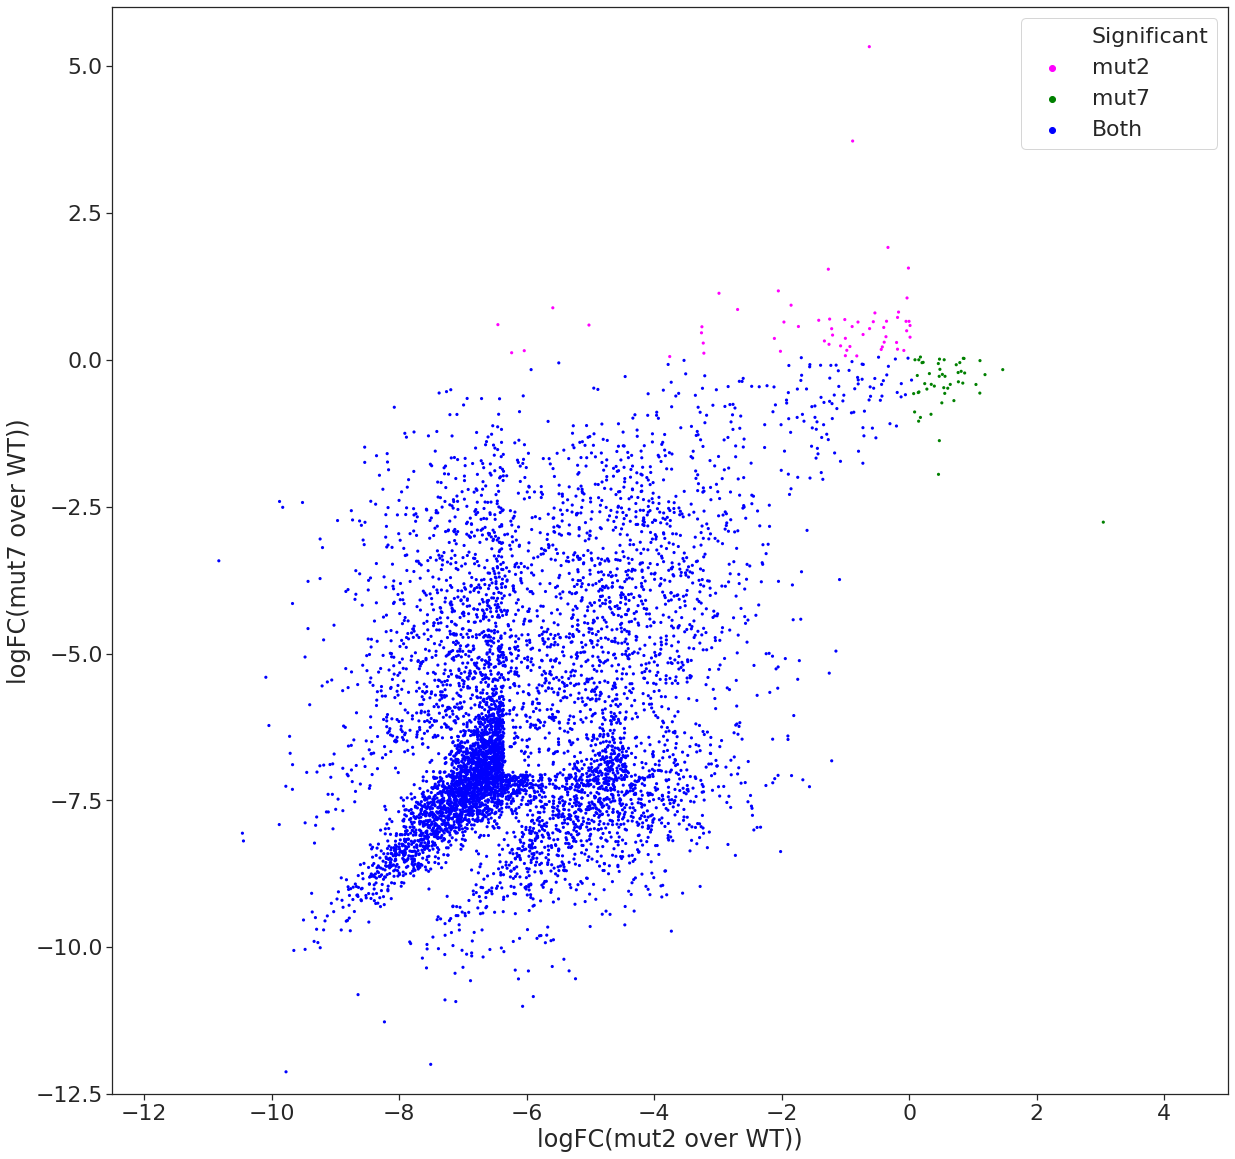

Both    6579
mut2      59
mut7      48
Name: Significant, dtype: int64

In [30]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

# Merge data DE__WT_A_B_C__Dpf_3_null and DE__WT_D_E_F__mut_2

In [54]:
name_x = "Dpf_3_null"
name_y = "mut2"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_A_B_C__Dpf_3_null_df, DE__WT_D_E_F__mut_2_df, on="id", how="outer")

In [55]:
df.shape, df.columns

((334950, 6),
 Index(['logFC_Dpf_3_null', 'logCPM_Dpf_3_null', 'FDR_Dpf_3_null', 'logFC_mut2',
        'logCPM_mut2', 'FDR_mut2'],
       dtype='object'))

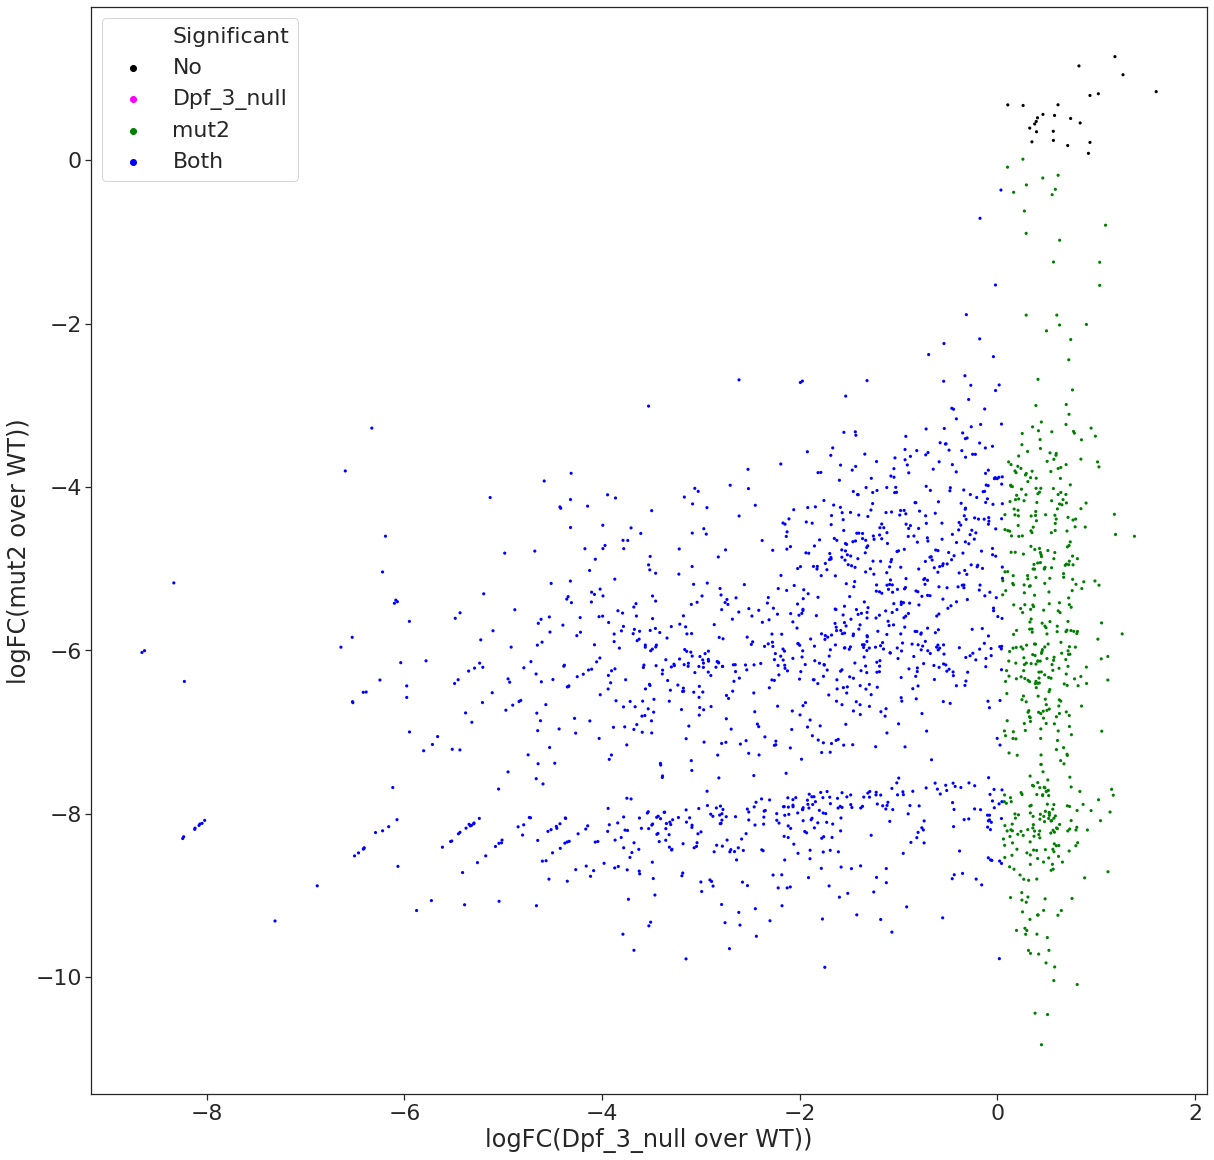

Both    1311
mut2     512
No        24
Name: Significant, dtype: int64

In [57]:
df_short = df[(df[f"logCPM_{name_x}"]>3) & (df[f"logCPM_{name_y}"]>3)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

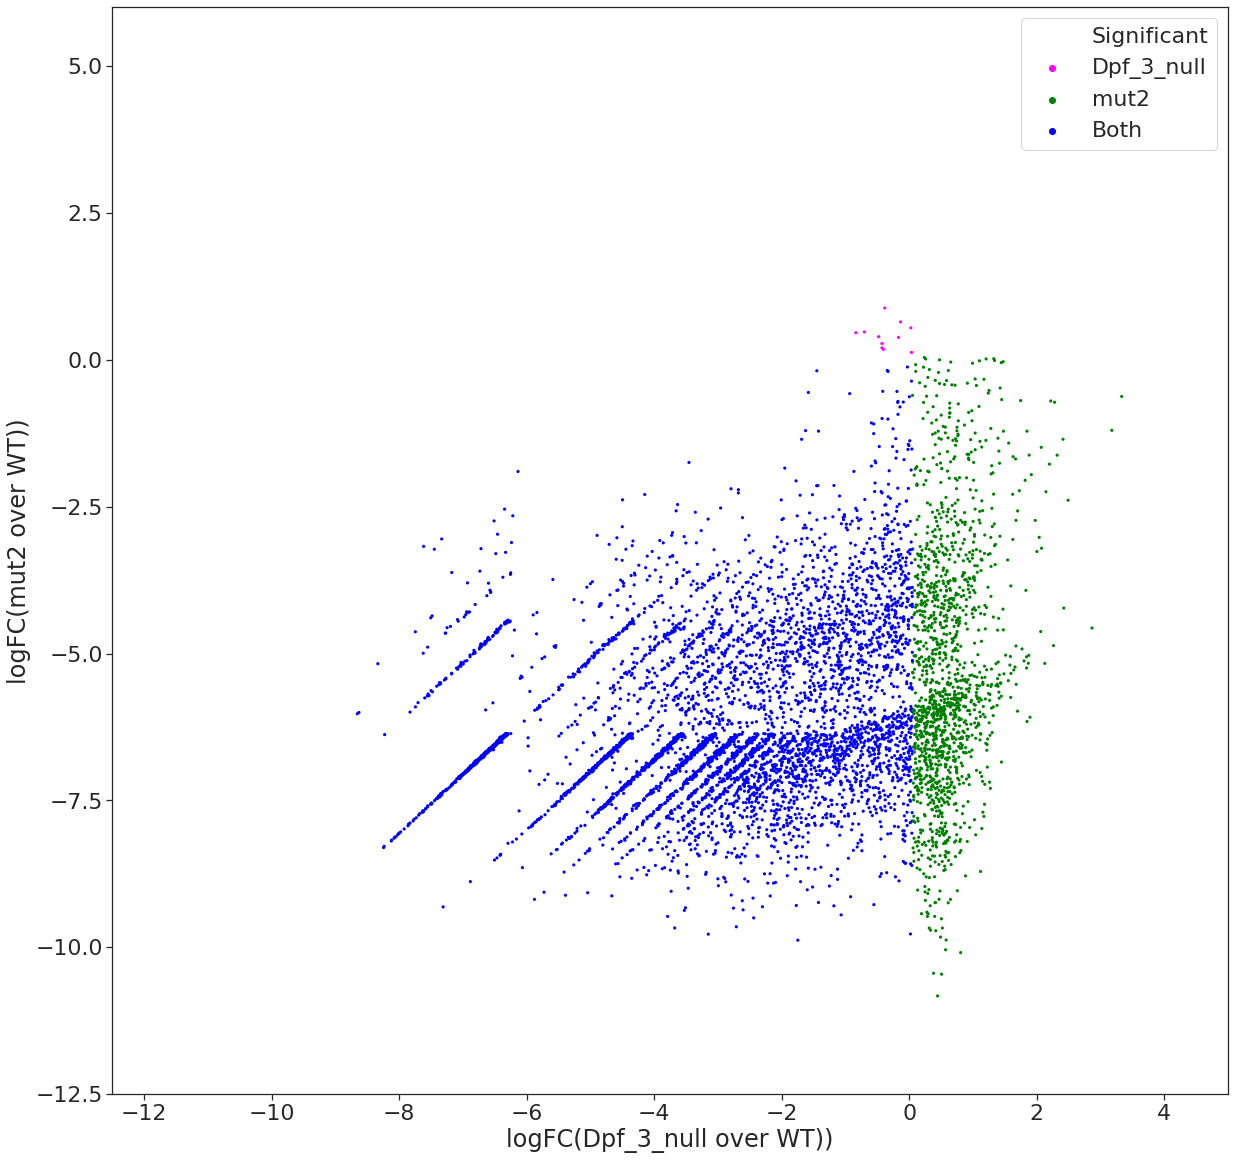

Both          5350
mut2          1477
Dpf_3_null      11
Name: Significant, dtype: int64

In [53]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

# Merge data DE__WT_A_B_C__Dpf_3_null and DE__WT_D_E_F__mut_7

In [35]:
name_x = "Dpf_3_null"
name_y = "mut7"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_A_B_C__Dpf_3_null_df, DE__WT_D_E_F__mut_7_df, on="id")

In [36]:
df.shape, df.columns

((147491, 6),
 Index(['logFC_Dpf_3_null', 'logCPM_Dpf_3_null', 'FDR_Dpf_3_null', 'logFC_mut7',
        'logCPM_mut7', 'FDR_mut7'],
       dtype='object'))

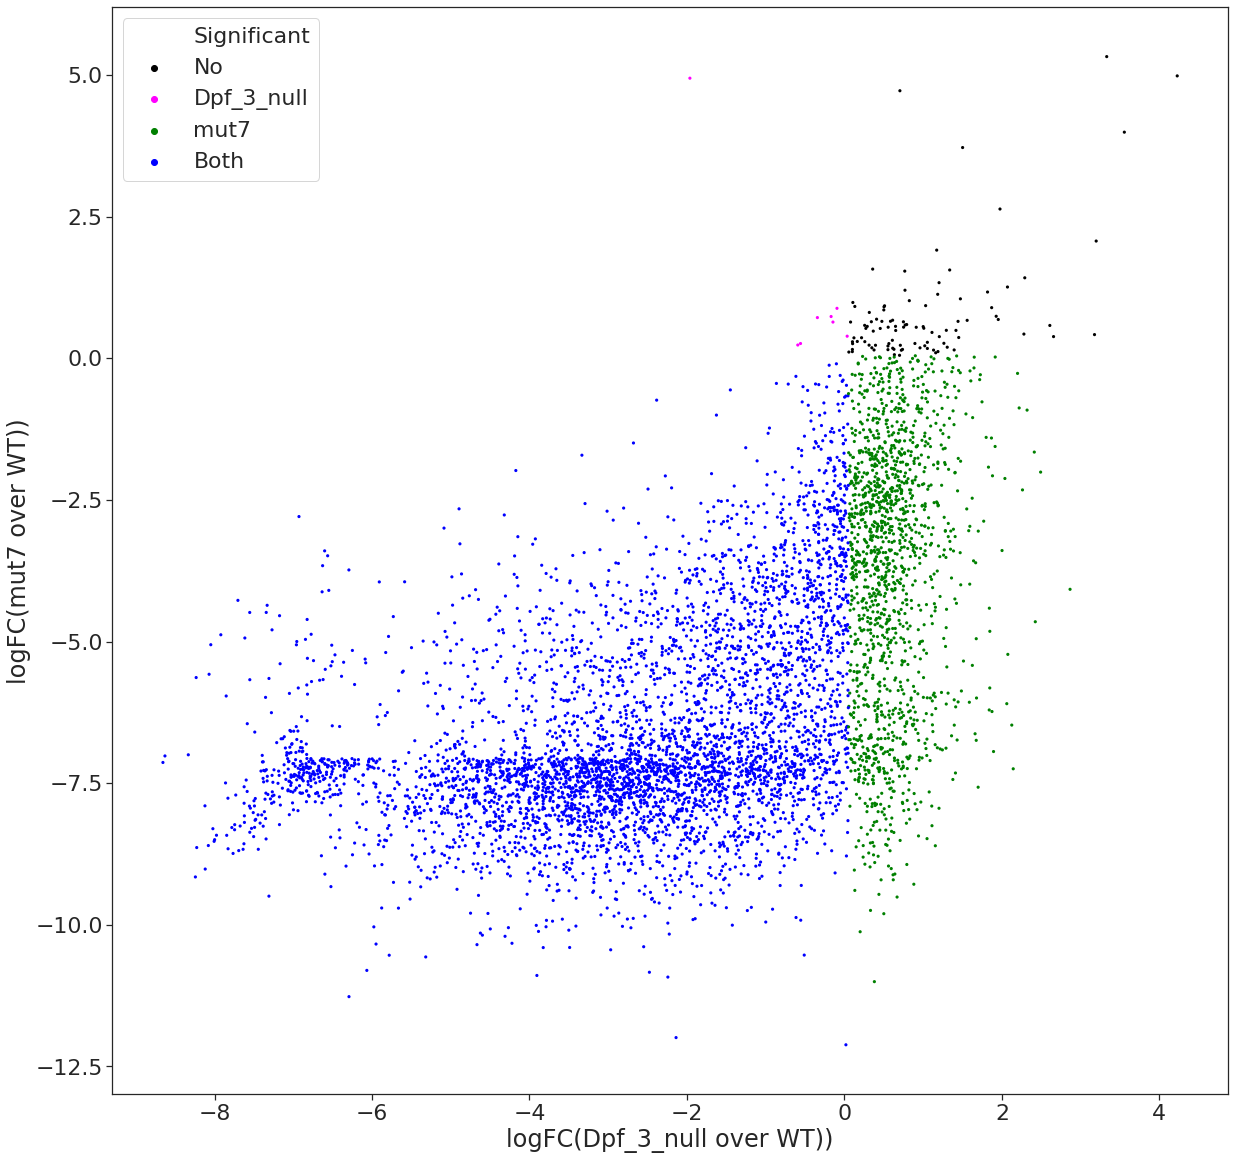

Both          4772
mut7          1477
No              96
Dpf_3_null       8
Name: Significant, dtype: int64

In [37]:
df_short = df[(df[f"logCPM_{name_x}"]>2) | (df[f"logCPM_{name_y}"]>2)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

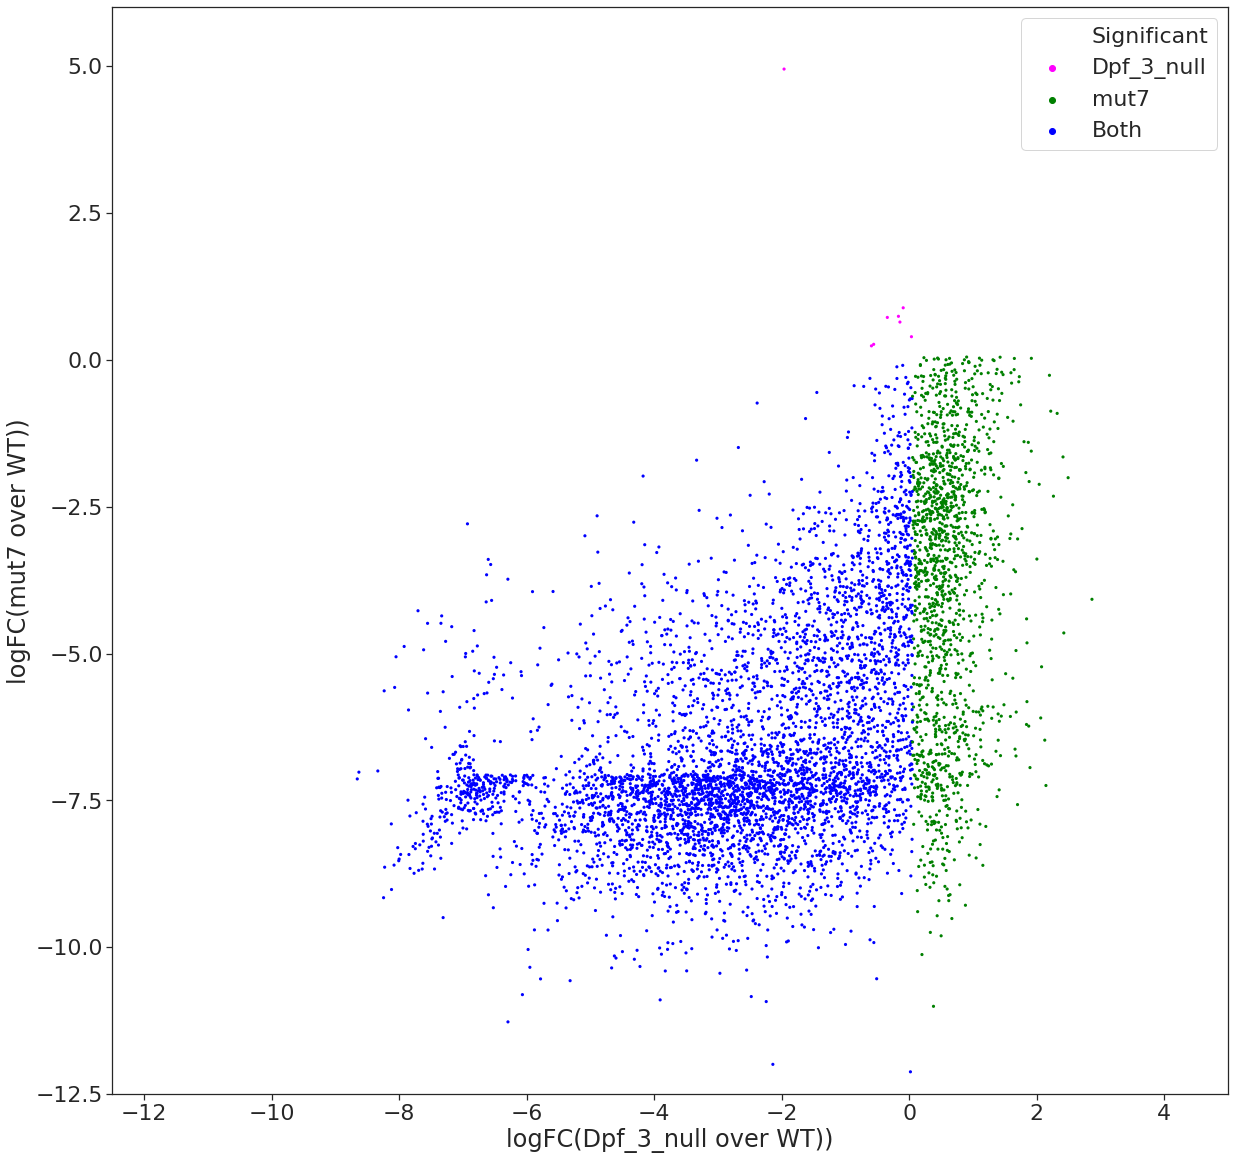

Both          4772
mut7          1477
Dpf_3_null       8
Name: Significant, dtype: int64

In [38]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

# Merge data DE__WT_D_E_F__Dpf_3_S784A and DE__WT_A_B_C__mut_2

In [39]:
name_x = "Dpf_3_S784A"
name_y = "mut2"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_D_E_F__Dpf_3_S784A_df, DE__WT_A_B_C__mut_2_df, on="id")

In [40]:
df.shape, df.columns

((127508, 6),
 Index(['logFC_Dpf_3_S784A', 'logCPM_Dpf_3_S784A', 'FDR_Dpf_3_S784A',
        'logFC_mut2', 'logCPM_mut2', 'FDR_mut2'],
       dtype='object'))

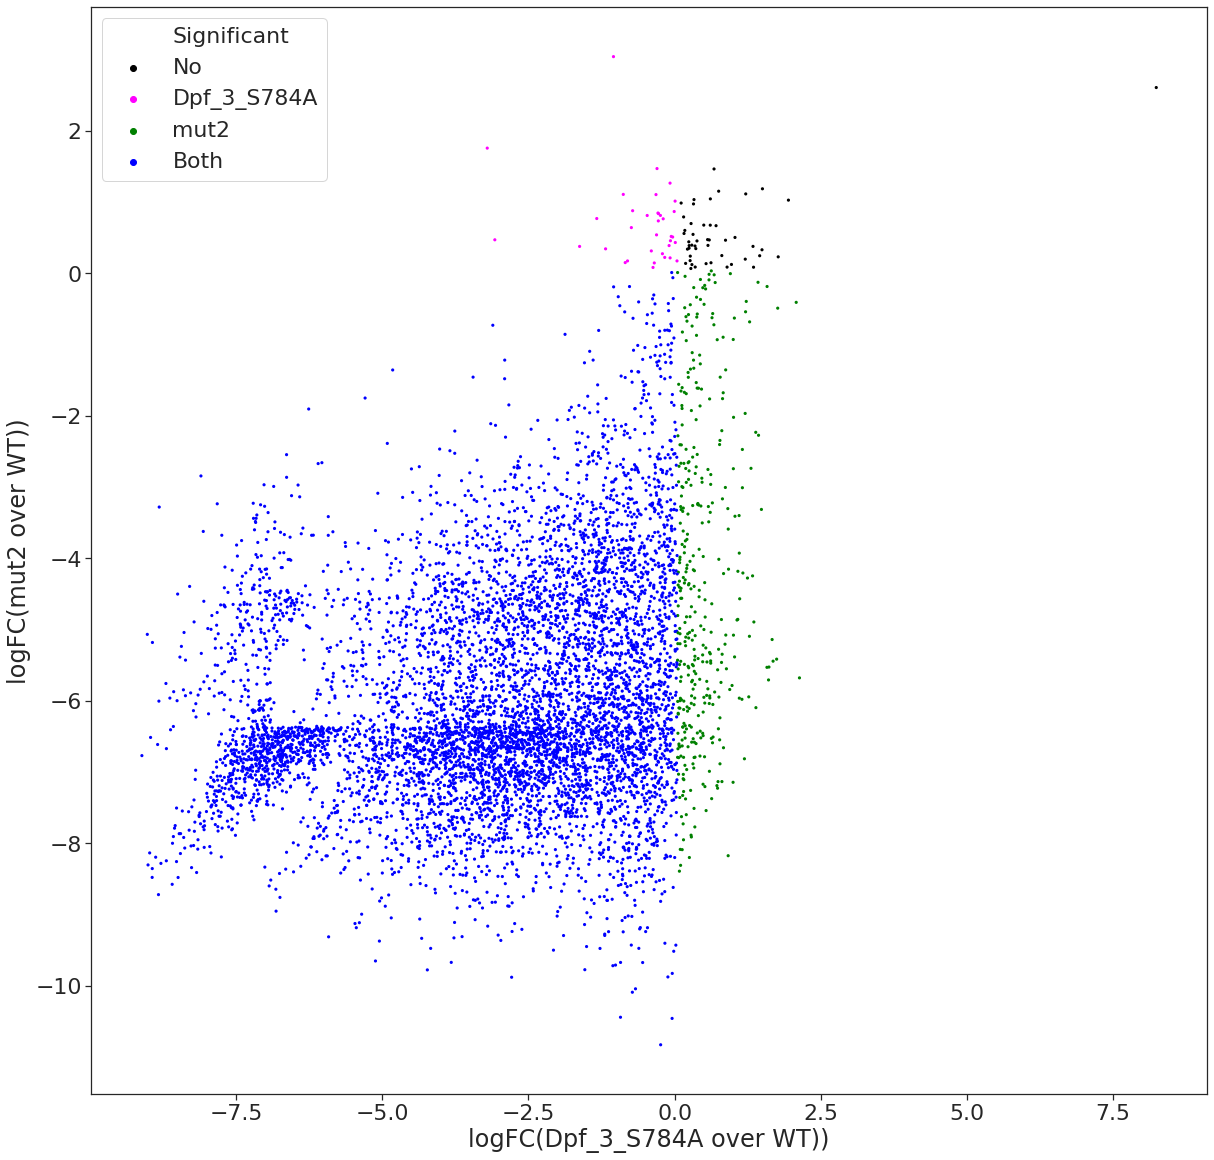

Both           6836
mut2            374
No               48
Dpf_3_S784A      35
Name: Significant, dtype: int64

In [41]:
df_short = df[(df[f"logCPM_{name_x}"]>2) | (df[f"logCPM_{name_y}"]>2)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

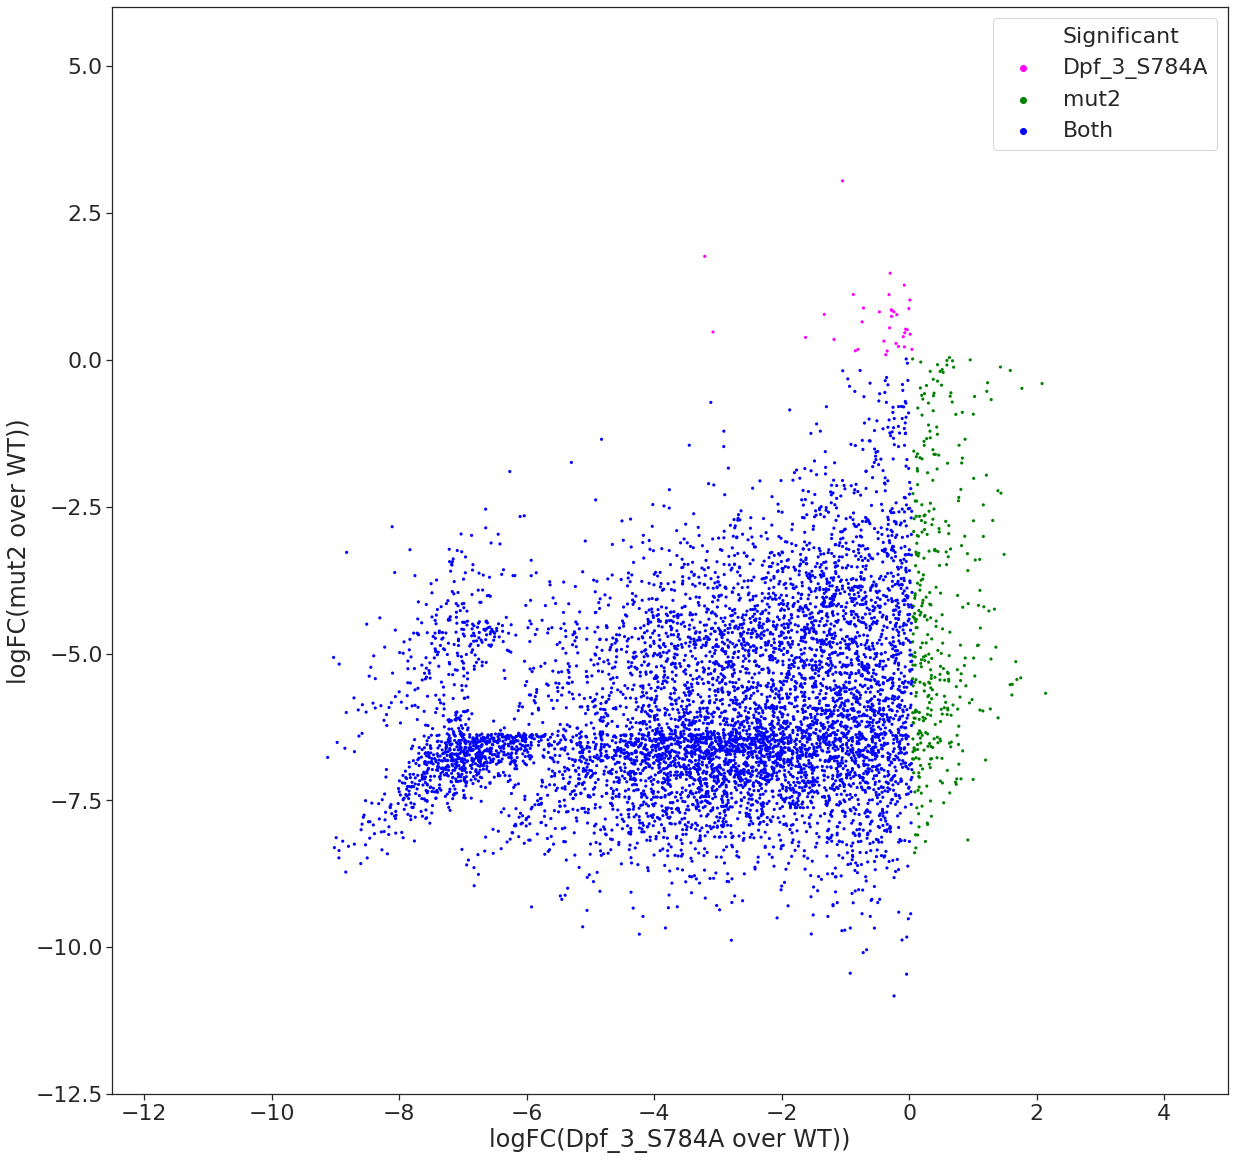

Both           6836
mut2            374
Dpf_3_S784A      35
Name: Significant, dtype: int64

In [42]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

# Merge data DE__WT_D_E_F__Dpf_3_S784A and DE__WT_A_B_C__mut_7

In [43]:
name_x = "Dpf_3_S784A"
name_y = "mut7"
# merge df (only datapoints that are common in both)
df = pd.merge(DE__WT_D_E_F__Dpf_3_S784A_df, DE__WT_A_B_C__mut_7_df, on="id")

In [44]:
df.shape, df.columns

((262616, 6),
 Index(['logFC_Dpf_3_S784A', 'logCPM_Dpf_3_S784A', 'FDR_Dpf_3_S784A',
        'logFC_mut7', 'logCPM_mut7', 'FDR_mut7'],
       dtype='object'))

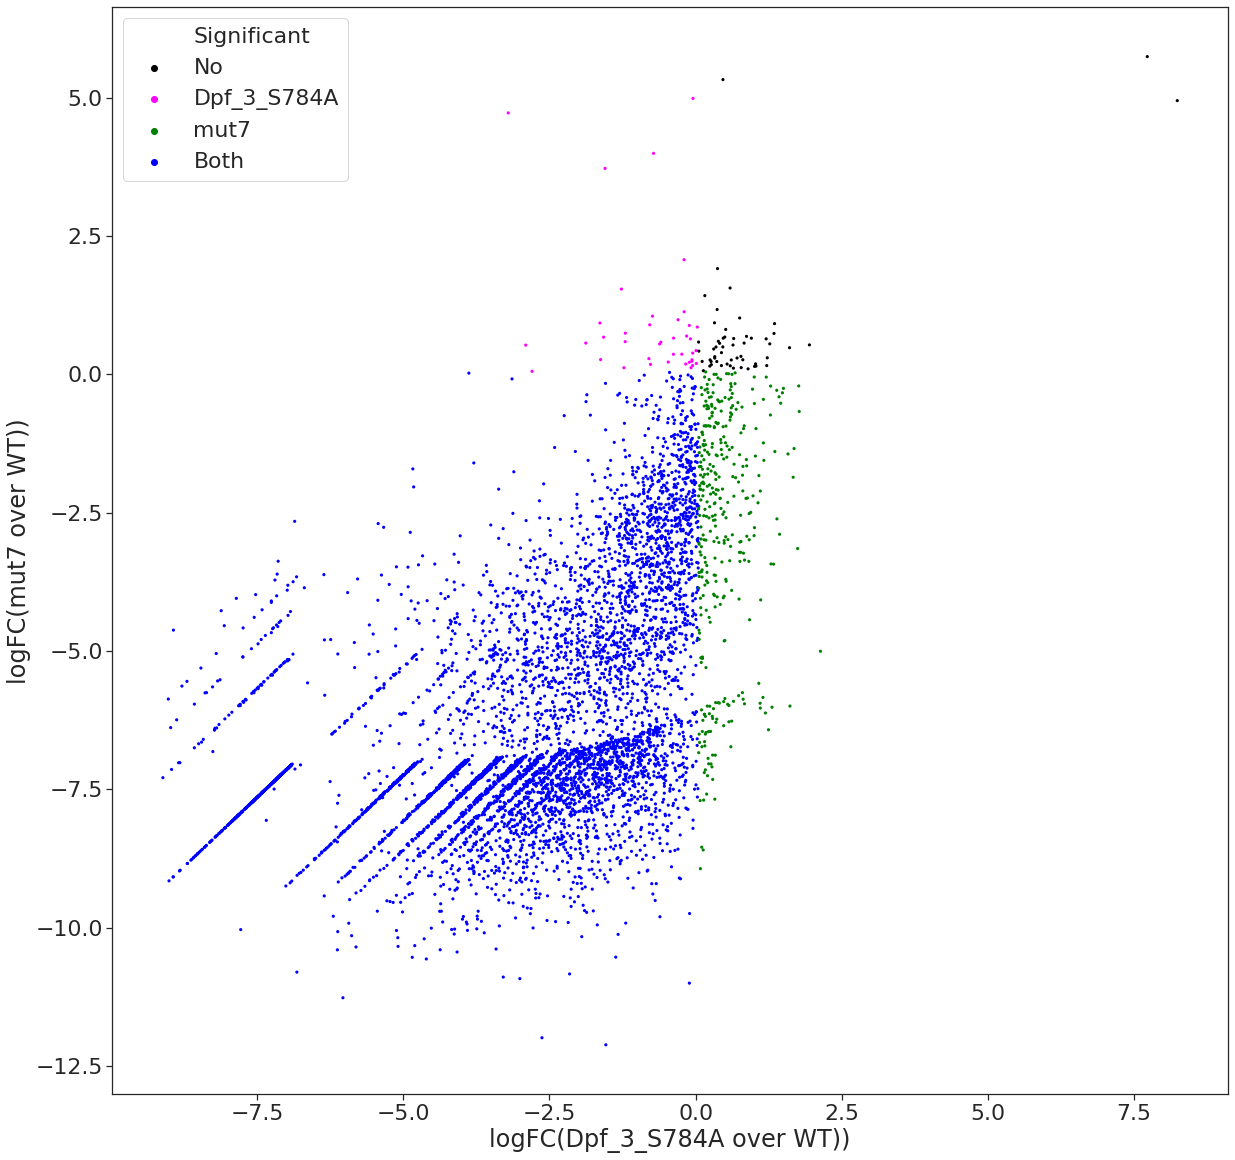

Both           5788
mut7            355
No               55
Dpf_3_S784A      40
Name: Significant, dtype: int64

In [45]:
df_short = df[(df[f"logCPM_{name_x}"]>2) | (df[f"logCPM_{name_y}"]>2)].copy()
df_short["Significant"] = "No"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]>0.05), "Significant"] = f"{name_x}"
df_short.loc[(df_short[f"logFC_{name_y}"]<=0.05) & (df_short[f"logFC_{name_x}"]>0.05), "Significant"] = f"{name_y}"
df_short.loc[(df_short[f"logFC_{name_x}"]<=0.05) & (df_short[f"logFC_{name_y}"]<=0.05), "Significant"] = "Both"

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=["No", f"{name_x}",  f"{name_y}", "Both"],
                           palette=["black", "magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
# sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}_with_no.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()

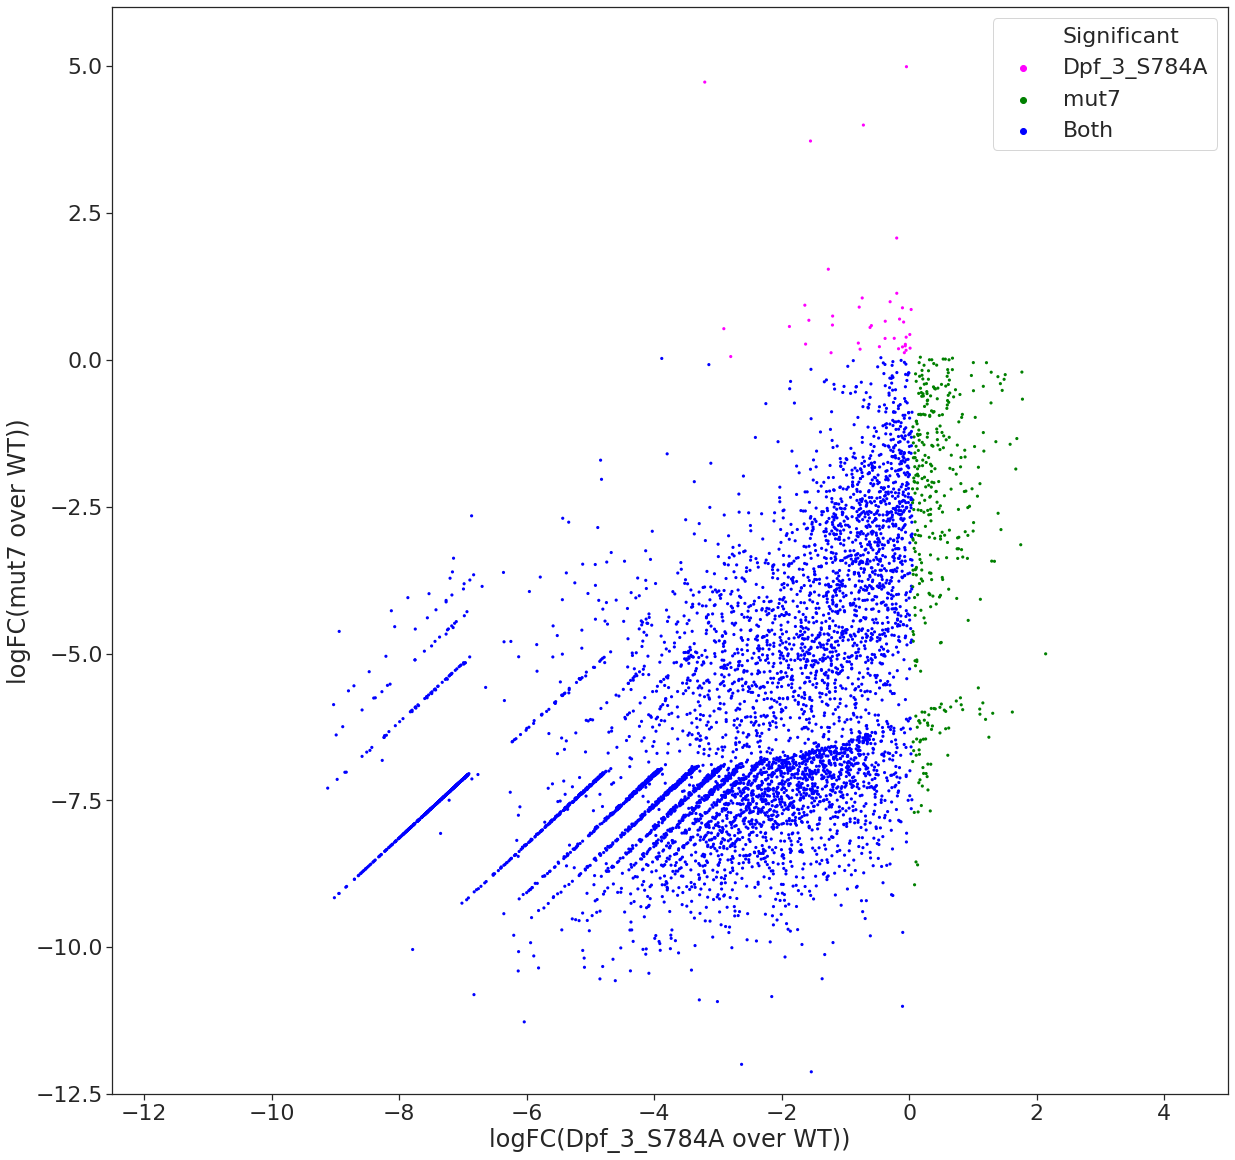

Both           5788
mut7            355
Dpf_3_S784A      40
Name: Significant, dtype: int64

In [46]:
df_short = df_short[df_short["Significant"] != "No"].copy()

plt.figure(figsize=(20,20))
sns_plot = sns.scatterplot(x=f"logFC_{name_x}",
                           y=f"logFC_{name_y}",
                           data=df_short, #.sort_values([f"Significant_{df_name}"]),
                           s=s,
                           hue=f"Significant",
                           hue_order=[f"{name_x}",  f"{name_y}", "Both"],
                           palette=["magenta", "green", "blue"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
sns_plot.set(xlim=xlim, ylim=ylim)
plt.xlabel(f"logFC({name_x} over WT))")
plt.ylabel(f"logFC({name_y} over WT))")
plt.savefig(f"plots/scatterplot_{name_x}_{name_y}.pdf")
plt.show()
plt.close()

df_short["Significant"].value_counts()